In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [2]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)        # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/DIN_budgetv2/'

first_year = 2014
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [3]:
# LOAD BATHY AND FLUXES #

ncfile       = '/scratch/usr/hbkoziel/bathy/ETOPO2v2c_f4.nc'
f           = Dataset(ncfile, 'r')
bathy    = f.variables['z'][:,:]
lonbathy    = f.variables['x'][:]
latbathy    = f.variables['y'][:]
Xbat, Ybat = np.meshgrid(lonbathy,latbathy)

In [4]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalArea = f.variables['cluster_area'][:]
f.close()

In [5]:
# V2 -> u.d(N) -> MEAN
# remote horizontal effect

tracername = 'HADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv2    = f1.variables['ADVH'][:,:].mean(axis=0)
hadv2    = np.sum(hadv2[:,:10],axis=1)*10

hadv2_u    = f1.variables['ADVU'][:,:].mean(axis=0)
hadv2_u    = np.sum(hadv2_u[:,:10],axis=1)*10

hadv2_v    = f1.variables['ADVV'][:,:].mean(axis=0)
hadv2_v    = np.sum(hadv2_v[:,:10],axis=1)*10

#hadv2 = hadv2 * 30
print np.shape(hadv2)
print np.nanmax(hadv2)
print np.nanmin(hadv2)
print np.nanmean(hadv2)

# remote vertical effect

tracername = 'VADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv2    = f1.variables['VADV'][:,:].mean(axis=0)
vadv2    = np.sum(vadv2[:,:10],axis=1)*10
#vadv2 = vadv2 * 30# * 24 *3600
print np.shape(vadv2)
print np.nanmax(vadv2)
print np.nanmin(vadv2)
print np.nanmean(vadv2)

(753179,)
455.6624
-605.0969
-0.0865956
(753179,)
253.7377
-244.81635
0.14252241


In [7]:
# # V2 -> u' . d(N') -> EDDY
# # eddy advection

tracername = 'HEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedyv2    = f1.variables['HEDY'][:,:].mean(axis=0)
hedyv2    = np.sum(hedyv2[:,:10],axis=1)*10

print np.nanmax(hedyv2)
print np.nanmin(hedyv2)
print np.nanmean(hedyv2)

tracername = 'VEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv2    = f1.variables['VEDY'][:,:].mean(axis=0)
vedyv2    = np.sum(vedyv2[:,:10],axis=1)*10
#vedyv2 = vedyv2 * 30# * 3600 * 30
print np.nanmax(vedyv2)
print np.nanmin(vedyv2)
print np.nanmean(vedyv2)

754.9009
-549.4462
0.7451874
438.8132
-168.23499
0.14853403


In [8]:
# tracername = 'BFACT'
# ncfile       = input_directory+tracername+'.1995.monthly.nc'
# f1           = Dataset(ncfile, 'r')
# bfact_mean    = f1.variables['BFACT'][:,:].mean(axis=0) + f1.variables['BFACT'][:2,:].mean(axis=0)
# bfact_max    = f1.variables['BFACT'][:,:].max(axis=0)
# bfact_min    = f1.variables['BFACT'][:,:].min(axis=0)
# bfact_std    = f1.variables['BFACT'][:,:].std(axis=0)
# bfact_diff    = np.diff(f1.variables['BFACT'][:,:],axis=0)
# bfact_int = np.sum(bfact_diff, axis=0) + np.sum(bfact_diff[:2,:], axis=0)
# print np.shape(bfact_mean)
# print np.nanmax(bfact_mean)
# print np.nanmin(bfact_mean)

In [9]:
# tracername = 'rv100m'
# ncfile       = input_directory+tracername+'.2014.monthly.nc'
# f1           = Dataset(ncfile, 'r')
# rv    = f1.variables['rv100m'][10,:]#.mean(axis=0)
# #bfact = bfact * 365 * 100
# #print np.shape(bfact)

In [10]:
ind_all = np.load('index_all.npy')

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


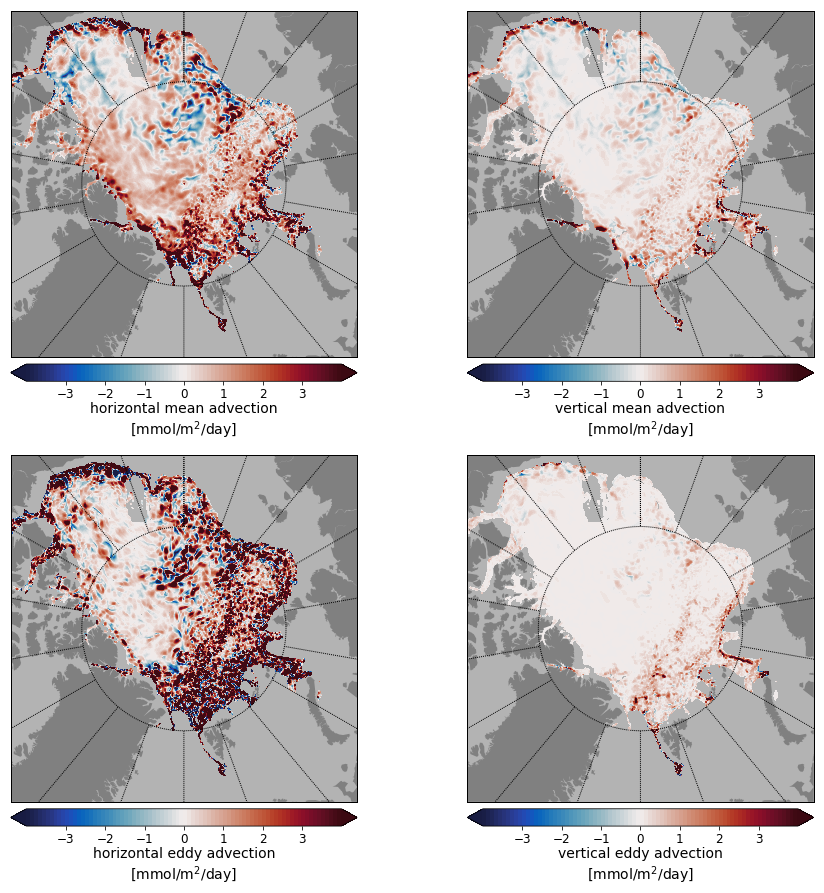

In [11]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
contours = np.arange(-4, 4.1, .1)

ax1      = fig.add_subplot(221)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2))
data[:] = np.nan
data[ind_all]=hadv2[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal mean advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-3, -2, -1, 0, 1, 2, 3])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(222)
data = np.empty(np.shape(vadv2))
data[:] = np.nan
data[ind_all]=vadv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical mean advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-3, -2, -1, 0, 1, 2, 3])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax3      = fig.add_subplot(223)
data = np.empty(np.shape(hedyv2))
data[:] = np.nan
data[ind_all]=hedyv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal eddy advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-3, -2, -1, 0, 1, 2, 3])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax4      = fig.add_subplot(224)
data = np.empty(np.shape(vedyv2))
data[:] = np.nan
data[ind_all]=vedyv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical eddy advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-3, -2, -1, 0, 1, 2, 3])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


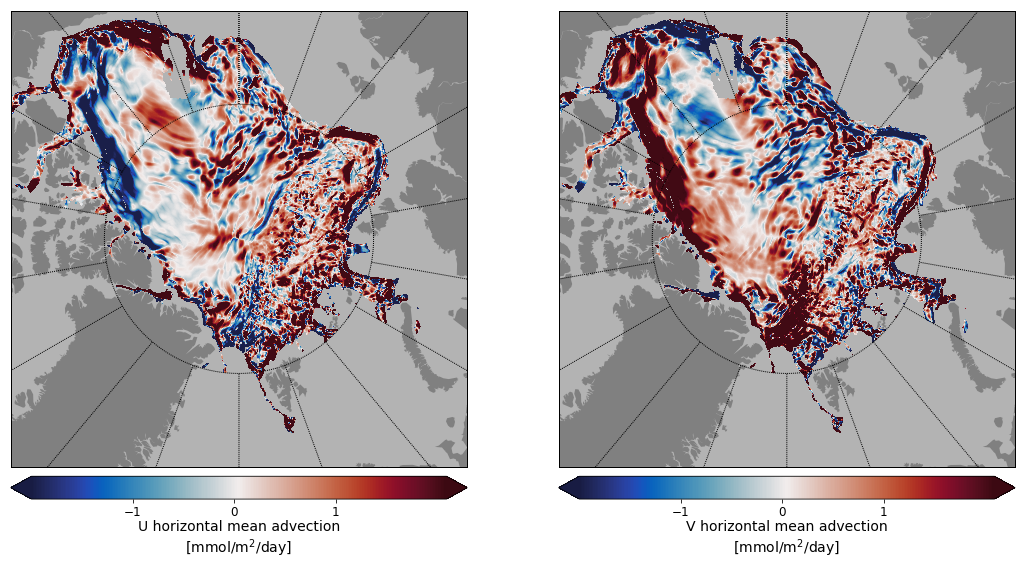

In [12]:
fig = plt.figure(figsize=(18, 10), facecolor='w', edgecolor='k')
contours = np.arange(-2, 2.1, .01)

ax1      = fig.add_subplot(121)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2_u))
data[:] = np.nan
data[ind_all]=hadv2_u[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'U horizontal mean advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(122)
data = np.empty(np.shape(hadv2_u))
data[:] = np.nan
data[ind_all]=hadv2_v[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'V horizontal mean advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

(10, 137186, 17)
(137186,)
/scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc20/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc20/pickle_mesh
(137186,)
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater_equal


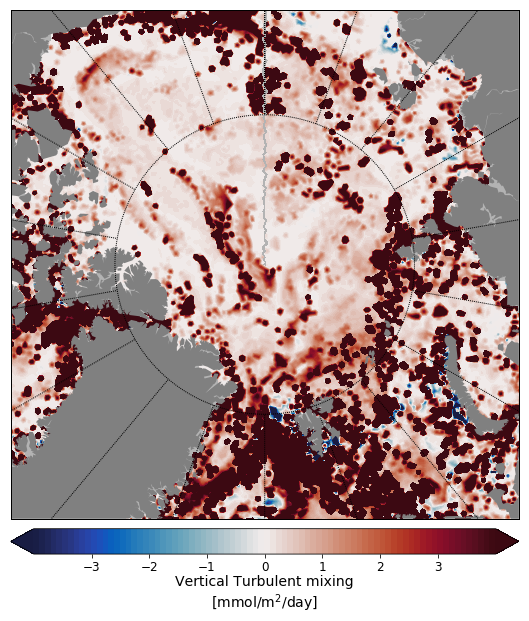

In [13]:
ncfile = '/scratch/usr/hbkoziel/Arc14/DIN_budgetv2/VMIXv2.2014.monthly.nc'
f           = Dataset(ncfile, 'r')
MIXN    = f.variables['VMIX'][:,:]
print np.shape(MIXN)

vmix = np.nanmean(MIXN[:9,:,0:10],axis=2)
#vmix = (MIXN[:,:,10])
vmix = np.nanmean(vmix, axis =0)*24*3600
print np.shape(vmix)

mesh_id    = 'meshArc20'
meshpath20   = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh20 = pf.load_mesh(meshpath20, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs  
print np.shape(mesh20.x2)

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
contours = np.arange(-4, 4.1, .1)

ax1      = fig.add_subplot(111)
# data = np.empty(np.shape(vmix))
# data[:] = np.nan
# data[ind_all]=vmix[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(vmix,mesh20,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh20.x2, mesh20.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'Vertical Turbulent mixing'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-3, -2, -1, 0, 1, 2, 3])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)